In [27]:
import numpy as np
import cv2 as cv
import glob
from matplotlib import pyplot as plt

In [35]:
chessboardSize = (7,7)
frameSize = (1069, 599)

In [36]:
# Termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [37]:
# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ... (6,5,0)
objp = np.zeros((chessboardSize[0] * chessboardSize[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:chessboardSize[0], 0:chessboardSize[1]].T.reshape(-1,2)

In [38]:
# Arrays to store object points and image points from all the images
objPoints = [] # 3D point in real world space
imgPoints = [] # 2D points in image plane

In [39]:
images = glob.glob('Images/*.png')

for image in images:
    img = cv.imread(image)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, chessboardSize, None)
    count = 0
    # If found, add object points, image points (after refining them)
    if ret == True:
        
        objPoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgPoints.append(corners)
        for i in range(corners2.shape[0]):
            x = corners[i,0,0]
            y = corners[i,0,1]
            cv.circle(img, (round(x),round(y)), 10, (0,0,255), -1)
        
        
        # Draw and display the corners
        # cv.drawChessboardCorners(img, chessboardSize, corners2, ret)
        # cv.imwrite('img{}.png'.format(count), img)
        # count +=1
        cv.imshow("img", img)
        cv.waitKey(1000)
    
cv.destroyAllWindows()

ret = False
ret = False
ret = False


In [7]:
ret, cameraMatrix, dist, rvecs, tvecs = cv.calibrateCamera(objPoints, imgPoints, frameSize, None, None)

print("Camera calibrated: ", ret)
print("\nCamera Matrix:\n", cameraMatrix)
print("\nDistortion Parameters:\n", dist)
print("\nRotation Vectors:\n", rvecs)
print("\nTranslation Vectors:\n", tvecs)

Camera calibrated:  0.2954562120574484

Camera Matrix:
 [[4.91866765e+03 0.00000000e+00 5.25359316e+02]
 [0.00000000e+00 4.82022029e+03 3.73525643e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion Parameters:
 [[-1.69265303e+00 -1.23519227e+02 -2.69481972e-02  7.34307731e-02
  -9.65038179e+03]]

Rotation Vectors:
 [array([[-0.02611522],
       [-0.17208999],
       [ 0.00457806]]), array([[-0.02980798],
       [-0.17536695],
       [ 0.00443965]])]

Translation Vectors:
 [array([[-3.95424172],
       [-4.16950195],
       [82.87330785]]), array([[-4.16959599],
       [-4.35888386],
       [85.42236585]])]


In [8]:
img = cv.imread(images[2])
h, w = img.shape[:2]
newCameraMatrix, roi = cv.getOptimalNewCameraMatrix(cameraMatrix, dist, (w,h), 1, (w,h))

# Undistort
dst = cv.undistort(img, cameraMatrix, dist, None, newCameraMatrix)

# Crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('caliResult1.png', dst)


True

In [29]:
# Undistort with remapping
mapx, mapy = cv.initUndistortRectifyMap(cameraMatrix, dist, None, newCameraMatrix, (w+200,h+200), 5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)

# Crop the image
x, y, w, h, = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('caliResult2.png', dst)

True

In [11]:
# Reprojection Error
mean_error = 0
for i in range(len(objPoints)):
    imgPoints2, _ = cv.projectPoints(objPoints[i], rvecs[i], tvecs[i], cameraMatrix, dist)
    error = cv.norm(imgPoints[i], imgPoints2, cv.NORM_L2)/len(imgPoints2)
    mean_error += error
    
print("total error: {}".format(mean_error/len(objPoints)))


total error: 0.042207644878993714


TypeError: Image data of dtype object cannot be converted to float

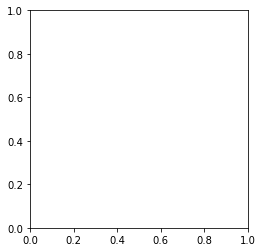

In [43]:
image1 = cv.imread(images[0])
image2 = cv.imread(images[1])
image3 = cv.imread(images[2])
image4 = cv.imread(images[3])
image5 = cv.imread(images[4])

plt.imshow(image1)
plt.show()
plt.imshow(image2)
plt.show()
plt.imshow(image3)
plt.show()
plt.imshow(image4)
plt.show()
plt.imshow(image5)
plt.show()

difference = cv.subtract(image1, image1)
print('image1 - image1: ', not np.any(difference))
difference = cv.subtract(image1, image2)
print('image1 - image2: ', not np.any(difference))
difference = cv.subtract(image1, image3)
print('image1 - image3: ', not np.any(difference))
difference = cv.subtract(image1, image4)
print('image1 - image4: ', not np.any(difference))
difference = cv.subtract(image1, image5)
print('image1 - image5: ', not np.any(difference))

difference = cv.subtract(image2, image1)
print('image2 - image1: ', not np.any(difference))
difference = cv.subtract(image2, image2)
print('image2 - image2: ', not np.any(difference))
difference = cv.subtract(image2, image3)
print('image2 - image3: ', not np.any(difference))
difference = cv.subtract(image2, image4)
print('image2 - image4: ', not np.any(difference))
difference = cv.subtract(image2, image5)
print('image2 - image5: ', not np.any(difference))

difference = cv.subtract(image3, image1)
print('image3 - image1: ', not np.any(difference))
difference = cv.subtract(image3, image2)
print('image3 - image2: ', not np.any(difference))
difference = cv.subtract(image3, image3)
print('image3 - image3: ', not np.any(difference))
difference = cv.subtract(image3, image4)
print('image3 - image4: ', not np.any(difference))
difference = cv.subtract(image3, image5)
print('image2 - image3: ', not np.any(difference))

difference = cv.subtract(image4, image1)
print('image4 - image1: ', not np.any(difference))
difference = cv.subtract(image4, image2)
print('image4 - image2: ', not np.any(difference))
difference = cv.subtract(image4, image3)
print('image4 - image3: ', not np.any(difference))
difference = cv.subtract(image4, image4)
print('image4 - image4: ', not np.any(difference))
difference = cv.subtract(image4, image5)
print('image4 - image5: ', not np.any(difference))

difference = cv.subtract(image5, image1)
print('image5 - image1: ', not np.any(difference))
difference = cv.subtract(image5, image2)
print('image5 - image2: ', not np.any(difference))
difference = cv.subtract(image5, image3)
print('image5 - image3: ', not np.any(difference))
difference = cv.subtract(image5, image4)
print('image5 - image4: ', not np.any(difference))
difference = cv.subtract(image5, image5)
print('image5 - image5: ', np.any(difference))